=== Expense Tracker Summary ===
Total Income     : ₹7200
Total Expenses   : ₹3750
Net Balance      : ₹3450
Highest Expense  : Rent (₹2000)

Category summary (category : amount):
 - Rent         : -₹2000
 - Shopping     : -₹800
 - Utilities    : -₹400
 - Transport    : -₹300
 - Food         : -₹250
 - Investments  : ₹1000
 - Freelance    : ₹1200
 - Salary       : ₹5000


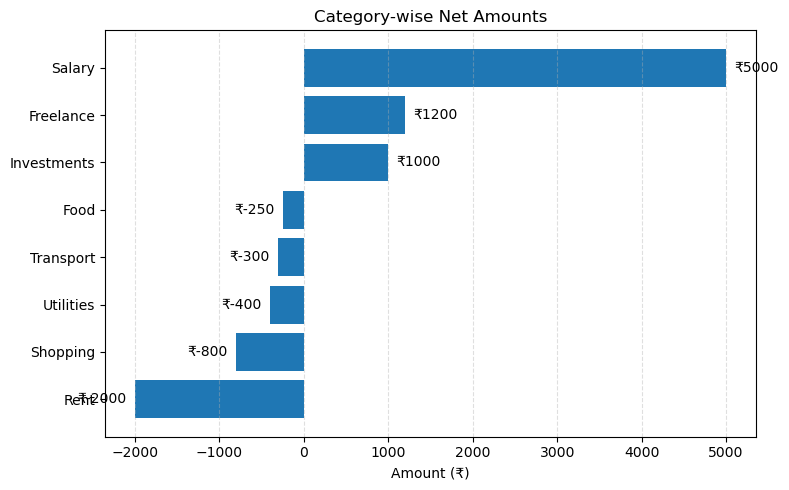

In [1]:
"""
Day 2 — Expense Tracker Insights
- Group transactions by category
- Compute totals (income, expenses, net)
- Find top 3 expense categories
- Plot category-wise amounts (requires matplotlib)
"""

from collections import defaultdict
import matplotlib.pyplot as plt

transactions = [
    {"category": "Food", "amount": -250},
    {"category": "Salary", "amount": 5000},
    {"category": "Transport", "amount": -300},
    {"category": "Freelance", "amount": 1200},
    {"category": "Rent", "amount": -2000},
    {"category": "Utilities", "amount": -400},
    {"category": "Shopping", "amount": -800},
    {"category": "Investments", "amount": 1000}
]


def analyze_transactions(txns):
    income_total = 0
    expense_total = 0
    by_category = defaultdict(int)

    for t in txns:
        amt = t["amount"]
        cat = t["category"].strip()
        by_category[cat] += amt
        if amt > 0:
            income_total += amt
        else:
            expense_total += abs(amt)  # convert to positive for totals

    net_balance = income_total - expense_total

    # convert dict to list of tuples and sort
    category_summary = sorted(by_category.items(), key=lambda x: x[1])

    # top 3 expense categories (most negative amounts -> largest expenses)
    top_expenses = sorted(
        [(cat, -amt) for cat, amt in by_category.items() if amt < 0],
        key=lambda x: x[1],
        reverse=True
    )[:3]

    return {
        "income_total": income_total,
        "expense_total": expense_total,
        "net_balance": net_balance,
        "category_summary": category_summary,
        "top_expenses": top_expenses
    }


def print_report(report):
    print("=== Expense Tracker Summary ===")
    print(f"Total Income     : ₹{report['income_total']}")
    print(f"Total Expenses   : ₹{report['expense_total']}")
    print(f"Net Balance      : ₹{report['net_balance']}")
    if report["top_expenses"]:
        highest = report["top_expenses"][0]
        print(f"Highest Expense  : {highest[0]} (₹{highest[1]})")
    print("\nCategory summary (category : amount):")
    for cat, amt in report["category_summary"]:
        sign = "₹" if amt >= 0 else "-₹"
        print(f" - {cat:12} : {sign}{abs(amt)}")


def plot_category_summary(report):
    # Plot category amounts (positive and negative)
    cats = [c for c, _ in report["category_summary"]]
    vals = [v for _, v in report["category_summary"]]

    plt.figure(figsize=(8, 5))
    bars = plt.barh(cats, vals)
    plt.title("Category-wise Net Amounts")
    plt.xlabel("Amount (₹)")
    plt.grid(axis="x", linestyle="--", alpha=0.4)

    # label bars
    for bar in bars:
        w = bar.get_width()
        plt.text(w + (100 if w >= 0 else -100), bar.get_y() + bar.get_height()/2,
                 f"₹{int(w)}", va='center',
                 ha='left' if w >= 0 else 'right')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    report = analyze_transactions(transactions)
    print_report(report)
    # Plot (optional); comment out if running headless
    try:
        plot_category_summary(report)
    except Exception as e:
        print("Plot failed (probably running headless). Error:", e)
        print("You can still view printed summary above.")
